In [66]:
import pandas as pd
import datatable as dt
import numpy as np
from datetime import datetime
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_ast_2 = dt.fread('ast_cleaned.csv').to_pandas()

In [3]:
df_ast_2.head()

,Absolute_Magnitude,Slope_parameter,Num_obs,rms,Perturbers,Perturbers_2,Mean_anomaly,Peri,Node,Inclination_ecliptic,...,Perihelion_dist,Aphelion_dist,Semilatus_rectum,Synodic_period,Orbit_type,Semi-minor axis (AU),Approx_Orbit_Length,Approx_Avg_Orb_Vel (AU/yr),Velocity_peri,Velocity_aphi
0,15.85,0.15,454.0,0.52,M-v,3Ek,7.23971,173.29981,218.17033,2.04676,...,2.842688,3.198740,1.505111,1.235291,MBA,2.132254,16.309064,3.106452,3.826792,3.400831
1,15.82,0.15,474.0,0.58,M-v,3Ek,133.20679,228.75924,185.15905,12.12504,...,2.394825,2.843281,1.299928,1.308781,MBA,1.845150,14.130278,3.333760,4.221489,3.555655
2,15.70,0.15,532.0,0.41,M-v,38h,279.92905,1.58763,237.08391,2.00984,...,2.386251,2.795270,1.287308,1.315453,MBA,1.826228,13.980506,3.352602,4.216042,3.599129
3,16.20,0.15,54.0,0.28,M-v,38h,97.76408,124.50964,33.42966,19.09499,...,2.867910,3.500305,1.576354,1.213596,MBA,2.240375,17.170712,3.022085,3.881871,3.180539
4,17.80,0.15,26.0,0.17,M-v,38h,231.95318,59.28061,230.69991,9.76283,...,2.083963,2.829865,1.200151,1.350742,MBA,1.717168,13.216437,3.431859,4.661306,3.432669


In [4]:
df_ast_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200675 entries, 0 to 200674
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Absolute_Magnitude          200675 non-null  float64       
 1   Slope_parameter             200675 non-null  float64       
 2   Num_obs                     200675 non-null  float64       
 3   rms                         200675 non-null  float64       
 4   Perturbers                  200675 non-null  object        
 5   Perturbers_2                200675 non-null  object        
 6   Mean_anomaly                200675 non-null  float64       
 7   Peri                        200675 non-null  float64       
 8   Node                        200675 non-null  float64       
 9   Inclination_ecliptic        200675 non-null  float64       
 10  Orbit_Eccentricity          200675 non-null  float64       
 11  Mean_daily_motion           200675 non-

# Pre-Processing and Training

In [5]:
# Split data into target feature and independent features and perform train test split/initially going to use all features
X = df_ast_2.drop(columns = 'Orbit_type')
y = df_ast_2['Orbit_type']

# One-hot encode categorical features
X = pd.get_dummies(data = X)

# Convert the datetime feature to numeric
X['Last_obs']= X['Last_obs'].apply(lambda x: x.toordinal())

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)



(140472, 29) (60203, 29)
(140472,) (60203,)


In [6]:
X_train.head()

,Absolute_Magnitude,Slope_parameter,Num_obs,rms,Mean_anomaly,Peri,Node,Inclination_ecliptic,Orbit_Eccentricity,Mean_daily_motion,...,Approx_Orbit_Length,Approx_Avg_Orb_Vel (AU/yr),Velocity_peri,Velocity_aphi,Perturbers_M-h,Perturbers_M-v,Perturbers_2_38h,Perturbers_2_38j,Perturbers_2_3Eh,Perturbers_2_3Ek
89240,17.10,0.15,59.0,0.21,69.47101,224.25087,70.17656,11.14374,0.087322,0.190613,...,16.131825,3.119837,3.957625,3.321956,0,1,1,0,0,0
95312,17.30,0.15,98.0,0.36,328.49107,95.18268,355.15098,12.43335,0.242004,0.224436,...,14.328242,3.262735,4.901048,2.991116,0,1,1,0,0,0
185668,17.34,0.15,104.0,0.48,148.60563,298.94402,147.73158,0.92367,0.044787,0.192543,...,16.040671,3.133620,3.804841,3.478636,0,1,0,0,0,1
191572,16.81,0.15,257.0,0.60,105.29973,344.00313,79.76019,10.63354,0.286409,0.219382,...,14.481550,3.223379,5.101855,2.830081,0,1,0,0,0,1
134913,17.20,0.15,102.0,0.42,301.01225,252.65872,227.99298,5.61755,0.132107,0.253867,...,13.301900,3.426224,4.556269,3.492917,0,1,1,0,0,0


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140472 entries, 89240 to 70083
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Absolute_Magnitude          140472 non-null  float64
 1   Slope_parameter             140472 non-null  float64
 2   Num_obs                     140472 non-null  float64
 3   rms                         140472 non-null  float64
 4   Mean_anomaly                140472 non-null  float64
 5   Peri                        140472 non-null  float64
 6   Node                        140472 non-null  float64
 7   Inclination_ecliptic        140472 non-null  float64
 8   Orbit_Eccentricity          140472 non-null  float64
 9   Mean_daily_motion           140472 non-null  float64
 10  Semi_major_axis             140472 non-null  float64
 11  Num_opps                    140472 non-null  int32  
 12  Last_obs                    140472 non-null  int64  
 13  Orbital_per

In [8]:
X_test.head()

,Absolute_Magnitude,Slope_parameter,Num_obs,rms,Mean_anomaly,Peri,Node,Inclination_ecliptic,Orbit_Eccentricity,Mean_daily_motion,...,Approx_Orbit_Length,Approx_Avg_Orb_Vel (AU/yr),Velocity_peri,Velocity_aphi,Perturbers_M-h,Perturbers_M-v,Perturbers_2_38h,Perturbers_2_38j,Perturbers_2_3Eh,Perturbers_2_3Ek
32953,15.16,0.15,566.0,0.48,133.92492,69.51692,262.94043,14.02852,0.294820,0.201964,...,15.288047,3.132718,5.008905,2.727928,0,1,0,0,0,1
147895,16.80,0.15,102.0,0.32,266.35858,352.90424,217.51324,0.96730,0.047630,0.196397,...,15.829361,3.154235,3.840988,3.491728,0,1,1,0,0,0
116527,18.40,0.15,35.0,0.31,15.20886,209.94515,148.01518,4.30056,0.219939,0.236719,...,13.855292,3.327699,4.873925,3.116518,0,1,1,0,0,0
114496,17.00,0.15,36.0,0.34,185.81716,22.90904,108.73292,14.13859,0.213201,0.188311,...,16.147159,3.085085,4.484248,2.908175,0,1,1,0,0,0
14291,20.60,0.15,43.0,0.61,326.99715,221.71615,163.02880,20.98493,0.595604,0.181957,...,15.483070,2.858389,7.091624,1.797325,0,1,1,0,0,0


In [9]:
# Now we standardize the magnitudes of the features


scaler = StandardScaler()

scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


### A second Train/Test set 

Here I will create a second train/test split with which to experiment with differing numbers of independent features for modeling.  I want to create it separately from the initial X, y so that it doesn't interfere with it and can easily be modified for quick examination/experimenting.

In [10]:
#X_2 = df_ast_2.drop(columns = ['Orbit_type', 'Perturbers', 'Perturbers_2', 'Last_obs', 'Slope_parameter', 'Orbit_Eccentricity', 'Velocity_peri', 'Mean_daily_motion'])

X_2 = df_ast_2[['Orbit_Eccentricity', 'Absolute_Magnitude', 'Semi_major_axis']]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size = 0.3, random_state = 7)

scaler.fit(X_train_2)

X_tr2_std = scaler.transform(X_train_2)
X_te2_std = scaler.transform(X_test_2)


# Modeling

## Logistic Regression 

In [11]:
# Logistic Regression model set up for multi-class classification
lr_model = LogisticRegression(multi_class = 'multinomial', max_iter = 500, random_state = 7, n_jobs = -1)

lr_model.fit(X_train_std, y_train)

y_pred_lr = lr_model.predict(X_test_std)

lr_model

LogisticRegression(max_iter=500, multi_class='multinomial', n_jobs=-1,
                   random_state=7)

In [12]:
# Make predictions on train set as a comparison
y_train_pred_lr = lr_model.predict(X_train_std)

print(accuracy_score(y_train, y_train_pred_lr))
print(classification_report(y_train, y_train_pred_lr))

0.9877911612278604
                                            precision    recall  f1-score   support

                                      Amor       0.95      0.97      0.96      1433
                                    Apollo       0.98      0.97      0.98      1768
                                      Aten       0.98      0.95      0.97       263
                                     Atira       0.50      0.20      0.29         5
                            Distant Object       0.99      0.99      0.99       472
                                     Hilda       0.92      0.98      0.95       575
                                  Hungaria       0.96      0.99      0.97      3201
                            Jupiter Trojan       1.00      1.00      1.00      1251
                                       MBA       0.99      1.00      0.99    128142
Object with perihelion distance < 1.665 AU       0.94      0.88      0.91      1903
                                   Phocaea       0.70   

In [13]:
# Perform CV to look at consistency of model
cv_lr = cross_validate(lr_model, X_train_std, y_train, cv = 5)

cv_lr_scores = cv_lr['test_score']

#print("Random Forest RandomSearchCV best params: {}".format(rf_randomCV.best_params_))

print("LogReg model CV scores: {}".format(cv_lr_scores))
print("LogReg model CV score mean: {}".format(np.mean(cv_lr_scores)))
print("LogReg model CV score std: {}".format(np.std(cv_lr_scores)))

LogReg model CV scores: [0.98804058 0.98729311 0.98743504 0.98626041 0.98697231]
LogReg model CV score mean: 0.9872002895017493
LogReg model CV score std: 0.0005839782094722136


In [14]:
print('LogReg model Accuracy score: {}'.format(accuracy_score(y_test, y_pred_lr)))

LogReg model Accuracy score: 0.9882730096506819


In [15]:
# Look at metrics on our test set
lr_cm = confusion_matrix(y_test, y_pred_lr)
lr_report = classification_report(y_test, y_pred_lr)

print(lr_cm)
print(lr_report)

[[  608     6     1     0     0     0     0     0     0    11     0]
 [   21   707     1     1     0     0     0     0     0     1     0]
 [    0     3   121     1     0     0     0     0     0     0     0]
 [    0     0     3     0     0     0     0     0     0     0     0]
 [    0     0     0     0   210     0     0     0     1     0     0]
 [    0     0     0     0     0   278     0     0     7     0     0]
 [    0     0     0     0     0     0  1401     0     0    16     0]
 [    0     0     0     0     0     2     0   551     0     0     0]
 [    0     0     0     0     1    14    30     0 54677     9    88]
 [   11     0     0     0     0     0    34     0    63   715     1]
 [    0     0     0     0     0     0     0     0   380     0   229]]
                                            precision    recall  f1-score   support

                                      Amor       0.95      0.97      0.96       626
                                    Apollo       0.99      0.97      0.

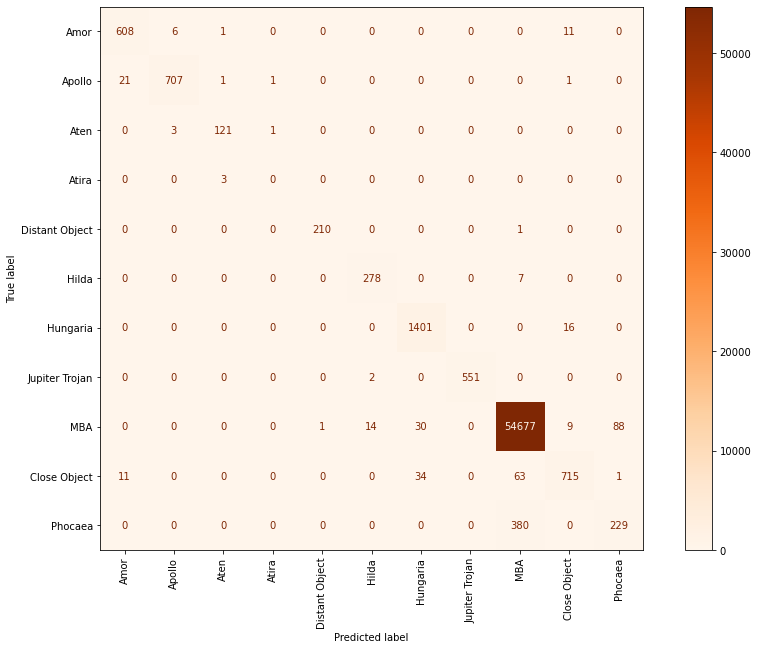

In [16]:
# Make a list of our target labels for Confusion Matrix Display
target_labels = ['Amor', 'Apollo', 'Aten', 'Atira', 'Distant Object', 'Hilda', 'Hungaria', 'Jupiter Trojan', 'MBA', 'Close Object', 'Phocaea']

lr_cm_disp = ConfusionMatrixDisplay(lr_cm, display_labels = target_labels)
fig, ax = plt.subplots(figsize = (15,10))
lr_cm_disp.plot(xticks_rotation = 'vertical', cmap = 'Oranges', ax=ax)
ax.grid(False)
plt.show()

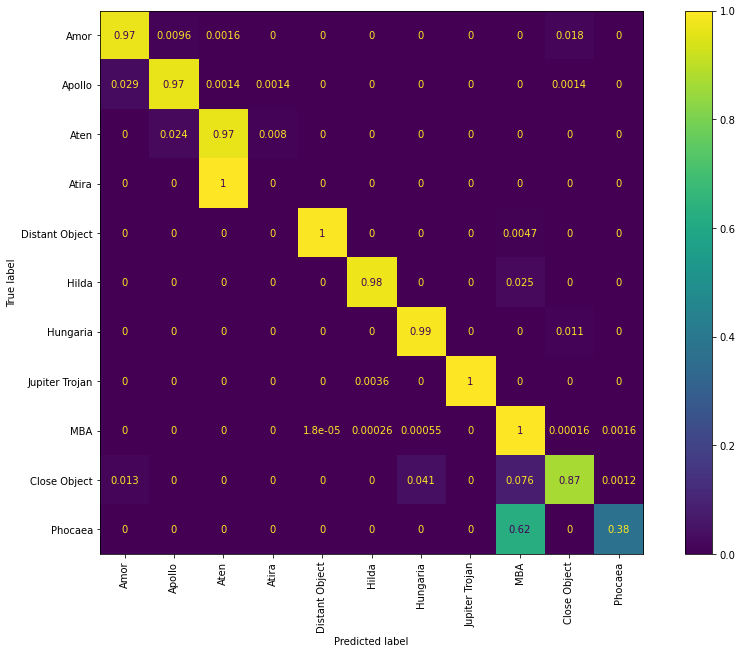

In [17]:
fig, ax = plt.subplots(figsize = (15,10))
plot_confusion_matrix(lr_model, X_test_std, y_test, display_labels = target_labels, normalize = 'true', 
                                                xticks_rotation = 'vertical', ax = ax)
plt.show()

In [19]:
# Let's take a look at the model feature coefficients
lr_model_coef = pd.DataFrame(zip(X_train.columns, np.transpose(lr_model.coef_.tolist()[0])), columns=['features', 'coef'])

lr_model_coef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   features  29 non-null     object 
 1   coef      29 non-null     float64
dtypes: float64(1), object(1)
memory usage: 592.0+ bytes


In [22]:
lr_model_coef.sort_values(by = 'coef', ascending = False)

,features,coef
8,Orbit_Eccentricity,7.274481
22,Velocity_aphi,5.504640
21,Velocity_peri,4.989674
20,Approx_Avg_Orb_Vel (AU/yr),2.624839
0,Absolute_Magnitude,1.974686
9,Mean_daily_motion,1.375673
15,Aphelion_dist,1.332012
2,Num_obs,0.967261
17,Synodic_period,0.626940
3,rms,0.451736


The LogReg model performed remarkably well on the test set.  Now I will try a model using the second train/test set split to compare how using less features impacts it.

In [23]:
# Create model using less features
lr_model_2 = LogisticRegression(multi_class = 'multinomial', max_iter = 500, random_state = 9, n_jobs = -1)

lr_model_2 = lr_model_2.fit(X_tr2_std, y_train_2)

y_pred_lr_2 = lr_model_2.predict(X_te2_std)

print('LogReg model Accuracy score: {}'.format(accuracy_score(y_test_2, y_pred_lr_2)))
print(confusion_matrix(y_test_2, y_pred_lr_2))
print(classification_report(y_test_2, y_pred_lr_2))


LogReg model Accuracy score: 0.9673770410112453
[[  357   134     0     0     0     1    35     0     0    76     0]
 [   70   639     0     0     0     0    13     0     0    24     0]
 [    7    97     7     0     0     0     7     0     0     1     0]
 [    0     4     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0   169     5     0     1     0     0     0]
 [    0     0     0     0     0     5     0     3   247     0     0]
 [    1     0     0     0     0     0  1349     0    79     3     0]
 [    0     0     0     0     0     5     0   513     0     0     0]
 [    6     0     0     0     0    11    16     6 54824    15     0]
 [   85     0     0     0     0     0    38     0   334   376     0]
 [    0     0     0     0     0     0     0     0   640     0     0]]


C:\Users\Michael\Documents\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael\Documents\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                            precision    recall  f1-score   support

                                      Amor       0.68      0.59      0.63       603
                                    Apollo       0.73      0.86      0.79       746
                                      Aten       1.00      0.06      0.11       119
                                     Atira       0.00      0.00      0.00         4
                            Distant Object       1.00      0.97      0.98       175
                                     Hilda       0.19      0.02      0.04       255
                                  Hungaria       0.93      0.94      0.93      1432
                            Jupiter Trojan       0.98      0.99      0.99       518
                                       MBA       0.98      1.00      0.99     54878
Object with perihelion distance < 1.665 AU       0.76      0.45      0.57       833
                                   Phocaea       0.00      0.00      0.00  

C:\Users\Michael\Documents\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It is important to remember that the dataset is very imbalanced (MBA is almost 91% of all observations orbit type).  This puts all scores in perspective.  A model that simply predicts all MBA will receive an accuracy score of just over 90%.  So in this case we really are aiming for a very high accuracy score in a truly useful model.  I experimented here with a variety of different amounts of features for X to see how it affected Logistic Regression (in the case visible here only 3 were used).  So the difference between this model and the initial lr_model is very significant despite the seemingly small difference of 2% accuracy.  

In [24]:
lr_model_2_coef = pd.DataFrame(zip(X_train_2.columns, np.transpose(lr_model_2.coef_.tolist()[0])), columns=['features', 'coef'])

lr_model_2_coef.sort_values(by = 'coef', ascending = False)

,features,coef
1,Absolute_Magnitude,2.351308
0,Orbit_Eccentricity,2.296554
2,Semi_major_axis,-12.281645


### LogReg Hyperparameter Tuning 

Attempt to tune LogReg model to see if any improvements can be made over the default model.  Will attempt to use RandomizedSearchCV to search over a few parameters.

In [25]:

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10],
              'solver': ['saga', 'sag', 'lbfgs', 'newton-cg']
              }

lr_randomCV = RandomizedSearchCV(lr_model, param_distributions = param_grid, n_iter = 20, random_state=1)
lr_search = lr_randomCV.fit(X_train_std, y_train)



In [28]:
print('Best LR tuned model params: {}'.format(lr_search.best_params_))

Best LR tuned model params: {'solver': 'newton-cg', 'C': 10}


In [35]:
lr_model_search = LogisticRegression(C = 10, solver = 'newton-cg', multi_class = 'multinomial', max_iter = 500, random_state = 22, n_jobs = -1)

lr_model_search.fit(X_train_std, y_train)

y_pred_lr_search = lr_model_search.predict(X_test_std)

lr_model_search


LogisticRegression(C=10, max_iter=500, multi_class='multinomial', n_jobs=-1,
                   random_state=22, solver='newton-cg')

In [36]:
print('Tuned LR model accuracy score: {}'.format(accuracy_score(y_test, y_pred_lr_search)))


Tuned LR model accuracy score: 0.9902828762686244


In [37]:
print(confusion_matrix(y_test, y_pred_lr_search))
print(classification_report(y_test, y_pred_lr_search))

[[  623     1     0     0     0     0     0     0     0     2     0]
 [   11   718     1     0     0     0     0     0     0     1     0]
 [    0     1   124     0     0     0     0     0     0     0     0]
 [    0     0     3     0     0     0     0     0     0     0     0]
 [    0     0     0     0   209     0     0     0     2     0     0]
 [    0     0     0     0     0   283     0     0     2     0     0]
 [    0     0     0     0     0     0  1402     0     2    13     0]
 [    0     0     0     0     0     0     0   553     0     0     0]
 [    0     0     0     0     1    11    29     0 54664     6   108]
 [    7     0     0     0     0     0    28     0    35   753     1]
 [    0     0     0     0     0     0     0     0   320     0   289]]


C:\Users\Michael\Documents\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael\Documents\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                            precision    recall  f1-score   support

                                      Amor       0.97      1.00      0.98       626
                                    Apollo       1.00      0.98      0.99       731
                                      Aten       0.97      0.99      0.98       125
                                     Atira       0.00      0.00      0.00         3
                            Distant Object       1.00      0.99      0.99       211
                                     Hilda       0.96      0.99      0.98       285
                                  Hungaria       0.96      0.99      0.97      1417
                            Jupiter Trojan       1.00      1.00      1.00       553
                                       MBA       0.99      1.00      1.00     54819
Object with perihelion distance < 1.665 AU       0.97      0.91      0.94       824
                                   Phocaea       0.73      0.47      0.57  

C:\Users\Michael\Documents\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The tuned LogReg model does show a minor improvement over the initial model, primarily through an improvement in correctly classifying Phocaea orbit types.  However a majority of actual Phocaea orbit types are still miss-classified. However a major downside was the fit time, the model took orders of magnitude longer to fit to the data then the initial LogReg model.

## Decision Tree Classifier

In [59]:
dt_model = DecisionTreeClassifier(random_state = 12)

dt_model.fit(X_train_std, y_train)

y_pred = dt_model.predict(X_test_std)

dt_model

DecisionTreeClassifier(random_state=12)

In [60]:
print('Default Decision Tree model accuracy: {}'.format(accuracy_score(y_test, y_pred)))

Default Decision Tree model accuracy: 0.9997840639170805


In [36]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  625     0     0     0     0     0     0     0     0     1     0]
 [    0   731     0     0     0     0     0     0     0     0     0]
 [    0     0   125     0     0     0     0     0     0     0     0]
 [    0     0     0     3     0     0     0     0     0     0     0]
 [    0     0     0     0   211     0     0     0     0     0     0]
 [    0     0     0     0     0   283     0     0     2     0     0]
 [    0     0     0     0     0     0  1415     0     0     2     0]
 [    0     0     0     0     0     0     0   553     0     0     0]
 [    0     0     0     0     0     1     0     0 54815     1     2]
 [    0     0     0     0     0     0     0     0     3   821     0]
 [    0     0     0     0     0     0     0     0     1     0   608]]
                                            precision    recall  f1-score   support

                                      Amor       1.00      1.00      1.00       626
                                    Apollo       1.00      1.00      1.

In [61]:
# Now try a model with criterion set to 'entropy' just for comparison
dt_model_entr = DecisionTreeClassifier(criterion = 'entropy', random_state = 14)

dt_model_entr.fit(X_train_std, y_train)

y_pred_2 = dt_model_entr.predict(X_test_std)

dt_model_entr

DecisionTreeClassifier(criterion='entropy', random_state=14)

In [62]:
print('Entropy Decision Tree model accuracy score: {}'.format(accuracy_score(y_test, y_pred_2)))

Entropy Decision Tree model accuracy score: 0.9998006743849974


In [38]:
print(confusion_matrix(y_test, y_pred_2))
print(classification_report(y_test, y_pred_2))

[[  625     0     0     0     0     0     0     0     0     1     0]
 [    0   731     0     0     0     0     0     0     0     0     0]
 [    0     0   125     0     0     0     0     0     0     0     0]
 [    0     0     0     3     0     0     0     0     0     0     0]
 [    0     0     0     0   211     0     0     0     0     0     0]
 [    0     0     0     0     0   283     0     0     2     0     0]
 [    0     0     0     0     0     0  1415     0     0     2     0]
 [    0     0     0     0     0     0     0   553     0     0     0]
 [    0     0     0     0     0     2     0     0 54816     1     0]
 [    0     0     0     0     0     0     0     0     3   821     0]
 [    0     0     0     0     0     0     0     0     1     0   608]]
                                            precision    recall  f1-score   support

                                      Amor       1.00      1.00      1.00       626
                                    Apollo       1.00      1.00      1.

In [39]:
cv_dt = cross_validate(dt_model, X_train_std, y_train, cv = 5)

cv_dt_scores = cv_dt['test_score']

print("Decision Tree model CV scores: {}".format(cv_dt_scores))
print("Decision Tree model CV score mean: {}".format(np.mean(cv_dt_scores)))
print("Decision Tree model CV score std: {}".format(np.std(cv_dt_scores)))

Decision Tree model CV scores: [0.99964406 0.99964406 0.99957286 0.99960846 0.99950167]
Decision Tree model CV score mean: 0.9995942244740545
Decision Tree model CV score std: 5.327814258222884e-05


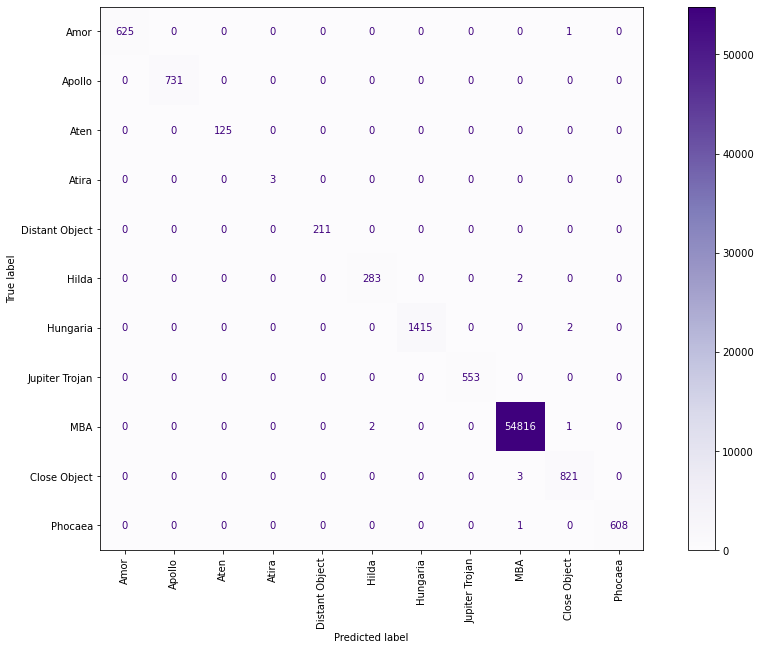

In [40]:

dt_cm_2 = confusion_matrix(y_test, y_pred_2)
dt_report_2 = classification_report(y_test, y_pred_2)

dt_cm_disp_2 = ConfusionMatrixDisplay(dt_cm_2, display_labels = target_labels)
fig, ax = plt.subplots(figsize = (16,10))
dt_cm_disp_2.plot(xticks_rotation = 'vertical', cmap = 'Purples', ax=ax)
ax.grid(False)
plt.show()


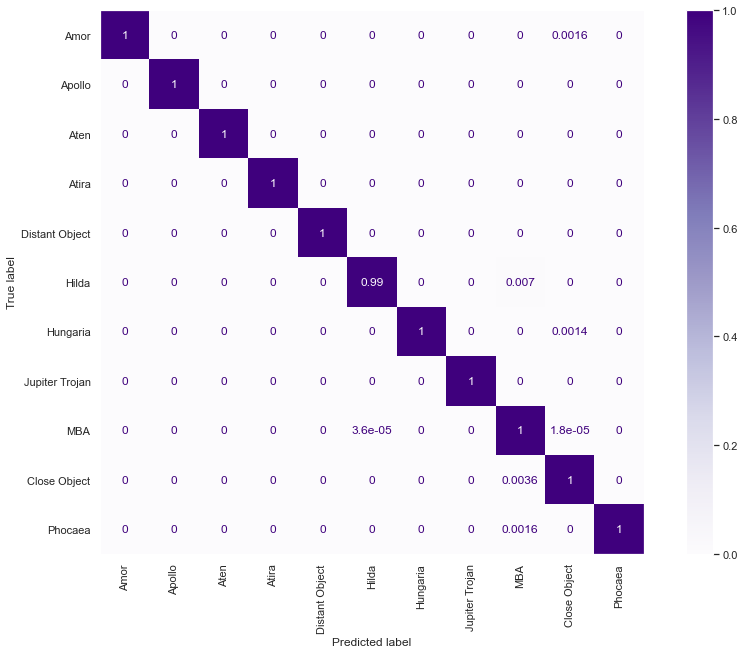

In [77]:
fig, ax = plt.subplots(figsize = (15,10))
plot_confusion_matrix(dt_model_entr, X_test_std, y_test, display_labels = target_labels, normalize = 'true', 
                                                xticks_rotation = 'vertical', cmap = 'Purples', ax = ax)
ax.grid(False)
plt.show()

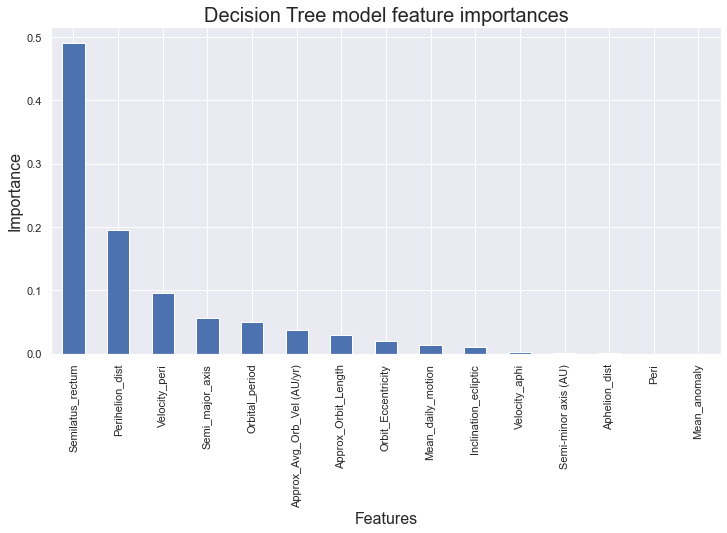

In [41]:
# Plot the feature importances for the model
sns.set()
plt.subplots(figsize=(12, 6))
dt_imps = dt_model.feature_importances_
dt_feat_imps = pd.Series(dt_imps, index=X_train.columns).sort_values(ascending=False)
dt_feat_imps_slice = dt_feat_imps[:15]
dt_feat_imps_slice.plot(kind='bar', color='b')
plt.xlabel('Features', fontsize=16)
plt.ylabel('Importance', fontsize=16)
plt.title('Decision Tree model feature importances', fontsize=20)
plt.show()

The Decision Tree model performs shockingly well on the test set.  An incredibly small number of Asteroid orbit types are incorrectly classified.  It is not even worth pursuing hyperparameter tuning.

## Support Vector Machine

In [38]:
# Create SVM model using LinearSVC with multi_class set to 'crammer_singer' as required for multi-class classification
svm_model = LinearSVC(multi_class = 'crammer_singer', max_iter = 5000, random_state = 8)

svm_model.fit(X_train_std, y_train)

y_pred_svm = svm_model.predict(X_test_std)

C:\Users\Michael\Documents\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [39]:
cv_svm = cross_validate(svm_model, X_train_std, y_train, cv = 5)

cv_svm_scores = cv_svm['test_score']

print("SVM model CV scores: {}".format(cv_svm_scores))
print("SVM model CV score mean: {}".format(np.mean(cv_svm_scores)))
print("SVM model CV score std: {}".format(np.std(cv_svm_scores)))

C:\Users\Michael\Documents\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Michael\Documents\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Michael\Documents\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Michael\Documents\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVM model CV scores: [0.98928635 0.98811176 0.98928597 0.98811134 0.98868086]
SVM model CV score mean: 0.9886952559399621
SVM model CV score std: 0.0005253496415233877


C:\Users\Michael\Documents\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [41]:
# Check accuracy on test set
print('LinearSVC model accuracy: {}'.format(accuracy_score(y_test, y_pred_svm)))

LinearSVC model accuracy: 0.9898011726990349


In [74]:
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[  614     3     1     0     0     0     0     0     0     8     0]
 [   24   706     1     0     0     0     0     0     0     0     0]
 [    0     4   118     3     0     0     0     0     0     0     0]
 [    0     0     3     0     0     0     0     0     0     0     0]
 [    0     0     0     0   210     0     0     0     1     0     0]
 [    0     0     0     0     0   284     0     0     1     0     0]
 [    0     0     0     0     0     0  1402     0     0    15     0]
 [    0     0     0     0     0     0     0   553     0     0     0]
 [    0     0     0     0     1    22    30     0 54715     8    43]
 [   13     0     0     0     0     0    32     0    57   721     1]
 [    0     0     1     0     0     0     0     0   342     0   266]]
                                            precision    recall  f1-score   support

                                      Amor       0.94      0.98      0.96       626
                                    Apollo       0.99      0.97      0.

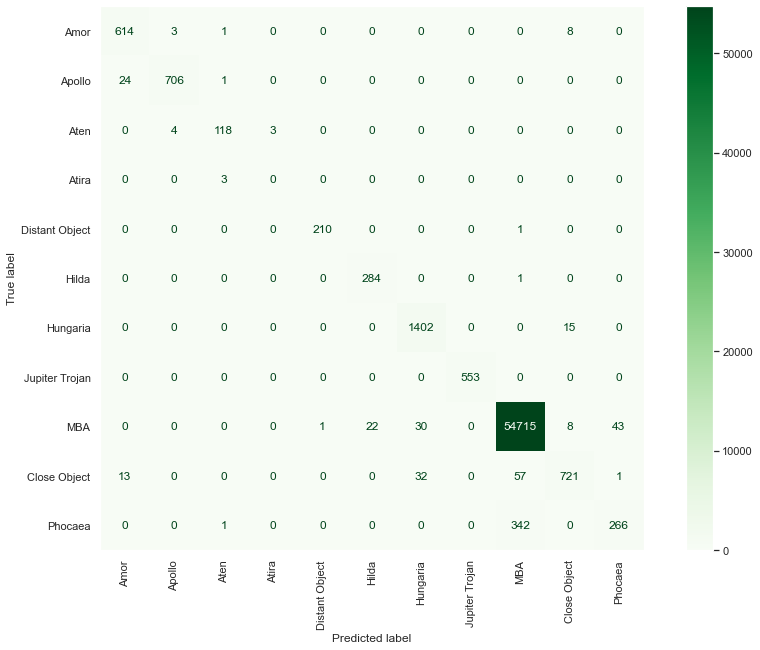

In [75]:
svm_cm = confusion_matrix(y_test, y_pred_svm)

svm_cm_disp = ConfusionMatrixDisplay(svm_cm, display_labels = target_labels)
fig, ax = plt.subplots(figsize = (15,10))
svm_cm_disp.plot(xticks_rotation = 'vertical', cmap = 'Greens', ax=ax)
ax.grid(False)
plt.show()

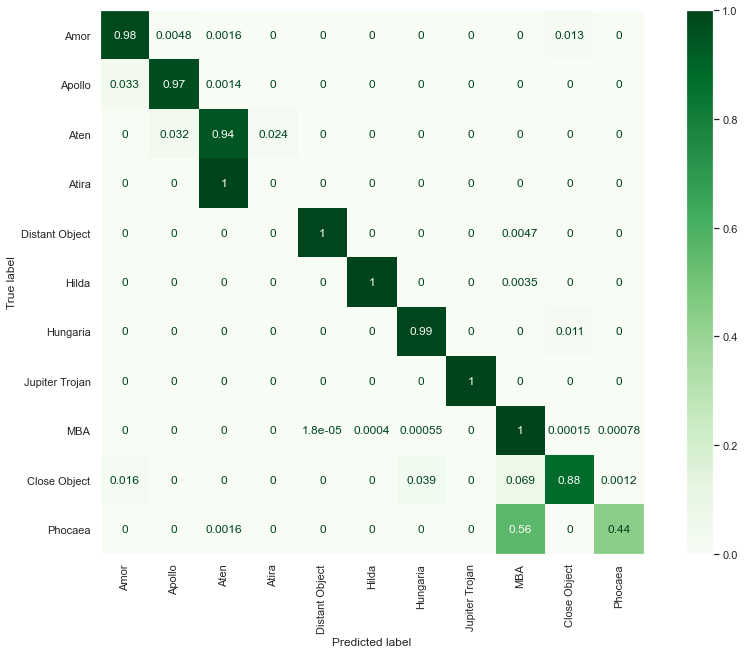

In [76]:
fig, ax = plt.subplots(figsize = (15,10))
plot_confusion_matrix(svm_model, X_test_std, y_test, display_labels = target_labels, normalize = 'true', 
                                                xticks_rotation = 'vertical', cmap = 'Greens', ax = ax)
ax.grid(False)
plt.show()

I wanted to try out a SVM model of some form.  I went with linearSVC due to it's inherent multiclass support.  An SVC model was considered as well but it is not recommended for larger datasets and uses a one vs. one multiclass classification scheme (which I would rather not use), so it was ultimately not implemented.  It performed pretty well, but clearly not as well as the DecisionTree model.  In particular, like the LogReg model, it specifically had a problem classifiying Phocaea orbit types correctly, classifiying them as instead as MBA.

## Naive Bayes

In [46]:
naive_model = GaussianNB()

naive_model.fit(X_train_std, y_train)

y_pred_naive = naive_model.predict(X_test_std)

In [47]:
cv_naive = cross_validate(naive_model, X_train_std, y_train, cv = 5)

cv_naive_scores = cv_naive['test_score']

print("Naive Bayes model CV scores: {}".format(cv_naive_scores))
print("Naive Bayes model CV score mean: {}".format(np.mean(cv_naive_scores)))
print("Naive Bayes model CV score std: {}".format(np.std(cv_naive_scores)))

Naive Bayes model CV scores: [0.71478911 0.76038441 0.71880117 0.71221613 0.71862319]
Naive Bayes model CV score mean: 0.7249628022103053
Naive Bayes model CV score std: 0.01788199284109367


In [ ]:
print('GaussianNB model accuracy: {}'.format(accuracy_score(y_test, y_pred_naive))

In [48]:
naive_cm = confusion_matrix(y_test, y_pred_naive)
naive_report = classification_report(y_test, y_pred_naive)

print(confusion_matrix(y_test, y_pred_naive))
print(classification_report(y_test, y_pred_naive))

[[   41   287     3    22     0     0     0     0     0   273     0]
 [    1   632    25    67     0     0     0     0     0     6     0]
 [    0     0    50    75     0     0     0     0     0     0     0]
 [    0     0     2     1     0     0     0     0     0     0     0]
 [    0     0     0     0   211     0     0     0     0     0     0]
 [    0     0     0     0     0   283     0     0     2     0     0]
 [    0     0     0     0     0     0  1402     0     0    15     0]
 [    0     0     0     0     0     0     0   553     0     0     0]
 [    0     0     0     0     3    26    28     0 38553  1958 14251]
 [    0     0     0     0     0     0    11     0     0   753    60]
 [    0     0     0     0     0     0     0     0     4     5   600]]
                                            precision    recall  f1-score   support

                                      Amor       0.98      0.07      0.12       626
                                    Apollo       0.69      0.86      0.

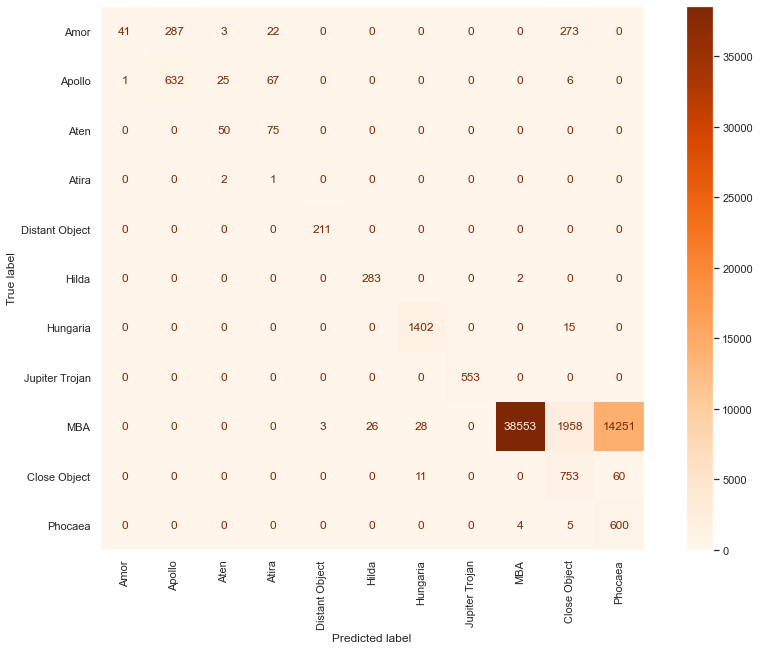

In [60]:
naive_cm_disp = ConfusionMatrixDisplay(naive_cm, display_labels = target_labels)
fig, ax = plt.subplots(figsize = (15,10))
naive_cm_disp.plot(xticks_rotation = 'vertical', cmap = 'Oranges', ax=ax)
ax.grid(False)
plt.show()

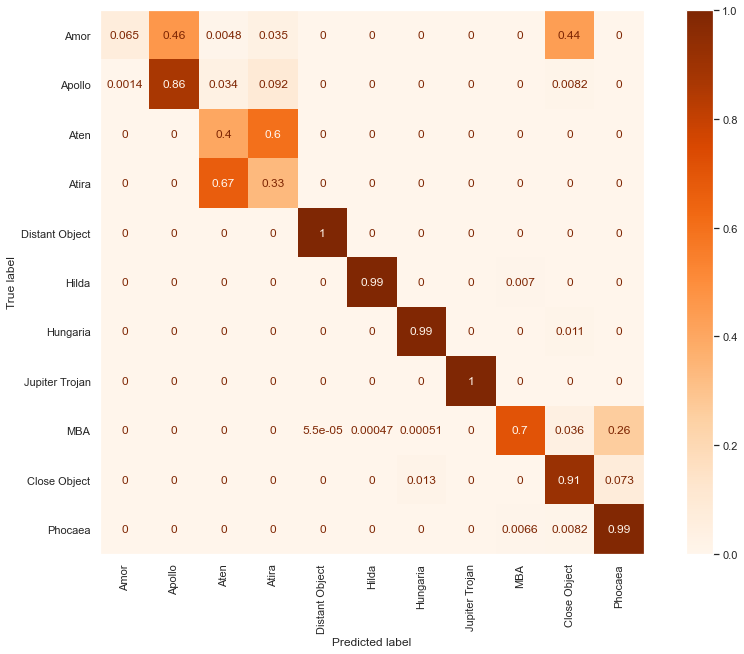

In [70]:
fig, ax = plt.subplots(figsize = (15,10))
plot_confusion_matrix(naive_model, X_test_std, y_test, display_labels = target_labels, normalize = 'true', 
                                                xticks_rotation = 'vertical', cmap = 'Oranges', ax = ax)
ax.grid(False)
plt.show()

The GaussianNB model clearly doesn't perform as well as any of the other algorithms.  This isn't surprising as it assumes Gaussian feature likelihood. I just wanted to try it and see how well it did dispite that for comparisons sake.

## Random Forest 

In [42]:
rf_model = RandomForestClassifier(random_state = 6)

rf_model.fit(X_train_std, y_train)

y_pred_rf = rf_model.predict(X_test_std)

rf_model

RandomForestClassifier(random_state=6)

In [44]:
print('Random Forest model accuracy: {}'.format(accuracy_score(y_test, y_pred_rf)))

Random Forest model accuracy: 0.9997840639170805


In [62]:
cv_rf = cross_validate(rf_model, X_train_std, y_train, cv = 5)

cv_rf_scores = cv_rf['test_score']

print("Random Forest model CV scores: {}".format(cv_rf_scores))
print("Random Forest model CV score mean: {}".format(np.mean(cv_rf_scores)))
print("Random Forest model CV score std: {}".format(np.std(cv_rf_scores)))

Random Forest model CV scores: [0.99957288 0.99957288 0.99957286 0.99953727 0.99953727]
Random Forest model CV score mean: 0.9995586306986868
Random Forest model CV score std: 1.7442780341807803e-05


In [52]:
rf_cm = confusion_matrix(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

print(rf_cm)
print(rf_report)

C:\Users\Michael\Documents\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael\Documents\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  626     0     0     0     0     0     0     0     0     0     0]
 [    0   731     0     0     0     0     0     0     0     0     0]
 [    0     0   125     0     0     0     0     0     0     0     0]
 [    0     0     3     0     0     0     0     0     0     0     0]
 [    0     0     0     0   211     0     0     0     0     0     0]
 [    0     0     0     0     0   283     0     0     2     0     0]
 [    0     0     0     0     0     0  1415     0     0     2     0]
 [    0     0     0     0     0     0     0   553     0     0     0]
 [    0     0     0     0     0     1     2     0 54815     1     0]
 [    1     0     0     0     0     0     1     0     0   822     0]
 [    0     0     0     0     0     0     0     0     0     0   609]]
                                            precision    recall  f1-score   support

                                      Amor       1.00      1.00      1.00       626
                                    Apollo       1.00      1.00      1.

C:\Users\Michael\Documents\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


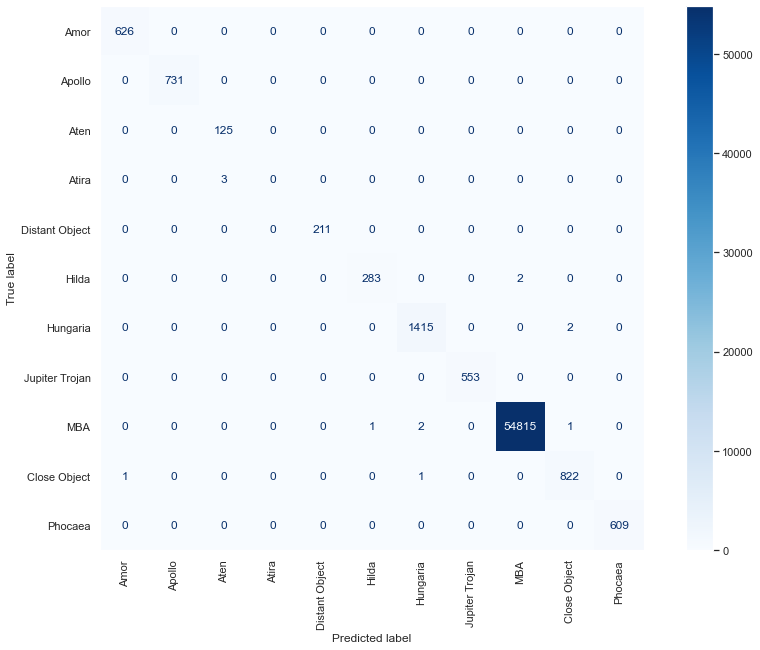

In [61]:
rf_cm_disp = ConfusionMatrixDisplay(rf_cm, display_labels = target_labels)
fig, ax = plt.subplots(figsize = (15,10))
rf_cm_disp.plot(xticks_rotation = 'vertical', cmap = 'Blues', ax=ax)
ax.grid(False)
plt.show()

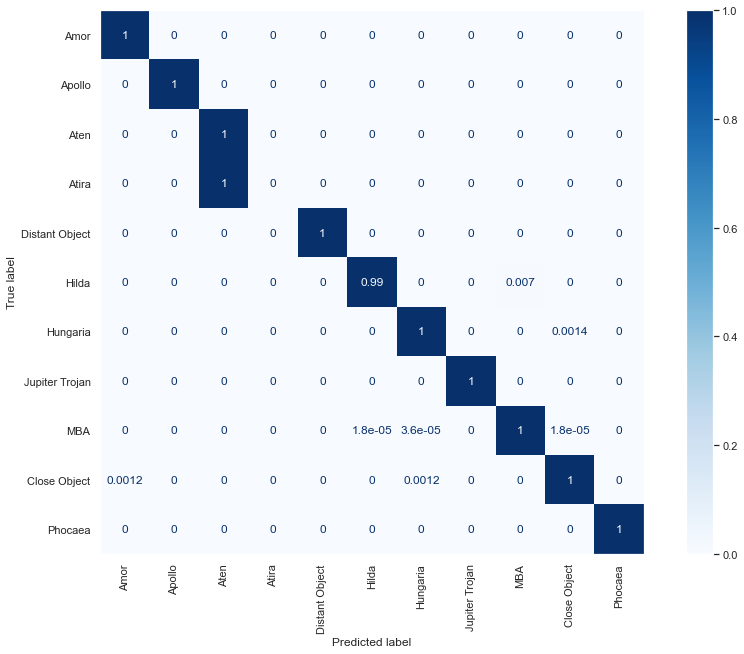

In [68]:
fig, ax = plt.subplots(figsize = (15,10))
plot_confusion_matrix(rf_model, X_test_std, y_test, display_labels = target_labels, normalize = 'true', 
                                                xticks_rotation = 'vertical', cmap = "Blues",ax = ax)
ax.grid(False)
plt.show()

Text(0.5, 1.0, 'Random Forest model feature importances')

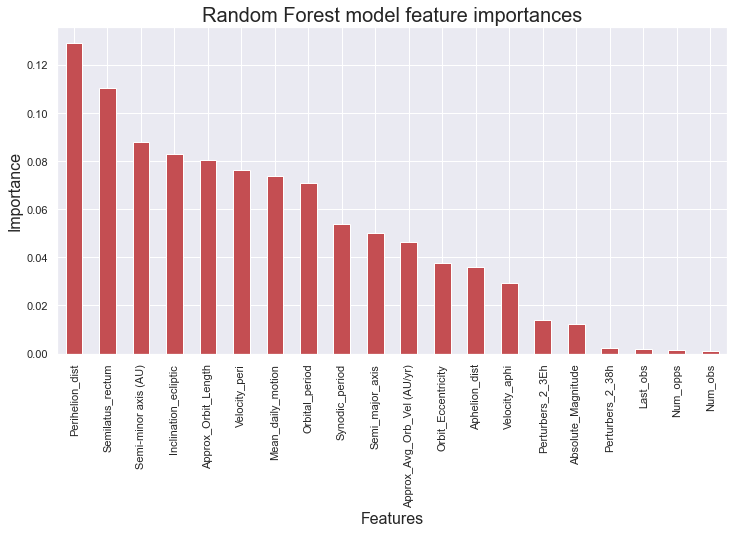

In [54]:
sns.set()
plt.subplots(figsize=(12, 6))
rf_imps = rf_model.feature_importances_
rf_feat_imps = pd.Series(rf_imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps_slice = rf_feat_imps[:20]
rf_feat_imps_slice.plot(kind='bar', color='r')
plt.xlabel('Features', fontsize=16)
plt.ylabel('Importance', fontsize=16)
plt.title('Random Forest model feature importances', fontsize=20)

The Random Forest model performs essientially identically to the decision tree model.  It is not as if it had much room for improvement though, both have near perfect predictions on the test set.  The one clear difference is the Random Forest model miss-classifies the extreme minority class Atira (only 3 examples in test set) whereas the DT model correctly classifies them. It is difficult to truly make a judgement between the two models based on 3 of approximately 60000 examples in test set, the Atira objects being such an extremely small sample size.

## Neural Network using Keras

In [50]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [51]:
encode = LabelEncoder()

encoded_y_train = encode.fit_transform(y_train)
encoded_y_test = encode.transform(y_test)

dummy_y_train = to_categorical(encoded_y_train)
dummy_y_test = to_categorical(encoded_y_test)

In [52]:
n_cols = X_train_std.shape[1]

kr_model = Sequential()
kr_model.add(Dense(100, activation = 'relu', input_shape = (n_cols,)))
kr_model.add(Dense(100, activation = 'relu'))
kr_model.add(Dense(100, activation = 'relu'))
kr_model.add(Dense(100, activation = 'relu'))
kr_model.add(Dense(11, activation = 'softmax'))
kr_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

kr_model.fit(X_train_std, dummy_y_train, epochs = 20)

Epoch 1/20
4390/4390 [==============================] - 4s 706us/step - loss: 0.0660 - accuracy: 0.9788
Epoch 2/20
4390/4390 [==============================] - 3s 699us/step - loss: 0.0307 - accuracy: 0.9885
Epoch 3/20
4390/4390 [==============================] - 3s 700us/step - loss: 0.0257 - accuracy: 0.9903
Epoch 4/20
4390/4390 [==============================] - 3s 732us/step - loss: 0.0231 - accuracy: 0.9910
Epoch 5/20
4390/4390 [==============================] - 3s 769us/step - loss: 0.0227 - accuracy: 0.9920
Epoch 6/20
4390/4390 [==============================] - 3s 774us/step - loss: 0.0191 - accuracy: 0.9928
Epoch 7/20
4390/4390 [==============================] - 3s 749us/step - loss: 0.0185 - accuracy: 0.9930
Epoch 8/20
4390/4390 [==============================] - 3s 711us/step - loss: 0.0181 - accuracy: 0.9932
Epoch 9/20
4390/4390 [==============================] - 3s 696us/step - loss: 0.0170 - accuracy: 0.9936
Epoch 10/20
4390/4390 [==============================] - 3s 713u

In [53]:
kr_model_eval = kr_model.evaluate(X_test_std, dummy_y_test, verbose = 0)

loss = kr_model_eval[0]
accuracy = kr_model_eval[1]

print(loss)
print(accuracy)

0.01075752079486847
0.9958141446113586


In [58]:
optimizer_list = ['SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']

kr_model_2 = Sequential()
kr_model_2.add(Dense(100, activation = 'relu', input_shape = (n_cols,)))
kr_model_2.add(Dense(100, activation = 'relu'))
kr_model_2.add(Dense(100, activation = 'relu'))
kr_model_2.add(Dense(100, activation = 'relu'))
kr_model_2.add(Dense(11, activation = 'softmax'))

loss_list = []
accuracy_list = []

for optimizer in optimizer_list:
    
    kr_model_2.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    hist = kr_model_2.fit(X_train_std, dummy_y_train, epochs = 20, verbose = 0)
    
    print("Model Optimizer: {}".format(optimizer))
    print(hist.history['accuracy'][-1])
    
    evaluate_test = kr_model_2.evaluate(X_test_std, dummy_y_test, verbose = 0)
    test_loss = evaluate_test[0]
    test_accuracy = evaluate_test[1]
    
    loss_list.append(test_loss)
    accuracy_list.append(test_accuracy)
    
    print('Test set loss: {}'.format(test_loss))
    print('Test set accuracy: {}'.format(test_accuracy))
    

Model Optimizer: SGD
0.9951164722442627
Test set loss: 0.01444430835545063
Test set accuracy: 0.9946016073226929
Model Optimizer: RMSprop
0.9896349310874939
Test set loss: 0.10375543683767319
Test set accuracy: 0.9877414703369141
Model Optimizer: Adadelta
0.9947818517684937
Test set loss: 0.06360718607902527
Test set accuracy: 0.9937544465065002
Model Optimizer: Adagrad
0.9970456957817078
Test set loss: 0.04278089851140976
Test set accuracy: 0.9955483675003052
Model Optimizer: Adamax
0.99791419506073
Test set loss: 0.0388956144452095
Test set accuracy: 0.9965283870697021
Model Optimizer: Nadam
0.9950666427612305
Test set loss: 0.017141636461019516
Test set accuracy: 0.9944521188735962
Model Optimizer: Ftrl
0.9122244715690613
Test set loss: 0.3095836043357849
Test set accuracy: 0.9105692505836487


It appears the Adamax optimizer performed best on the test set. The Ftrl performed notably worse than the other models.  I could spend a lot of time tweaking (adding layers and changing learning rates etc.) and working with neural network models but I think it would be an inefficient use of time.  This was mainly done for reference and further practice implementing them.  These simple ones did perform quite well though, thought notably not as well as the tree type models.  For this application I also prefer the interpretability of the standard machine learning models.

## Final Model

I think the clear choice is one of the tree based models.  The Decision Tree and Random Forest models perform nearly identically.  In the end I think the simple decision tree model is the best option since it is so straightforward and does seem to perform ever so slightly better on the extreme minority classes (for example Atira orbit type).

In [69]:
# Save model, and versions just in case

import joblib as joblib

best_model_ast = dt_model_entr
best_model_ast.version = '1.0'
best_model_ast.pandas_version = pd.__version__
best_model_ast.numpy_version = np.__version__
best_model_ast.sklearn_version = sklearn_version
best_model_ast.build_datetime = datetime.now()

joblib_file = "joblib_best_model_ast.pkl"
joblib.dump(best_model_ast, joblib_file)

['joblib_best_model_ast.pkl']